In [3]:
# Импортируем библиотеки
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random

import numpy as np

from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

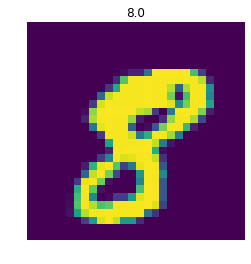

In [14]:
# Подготовка датасета
# Загрузить данные
train = pd.read_csv(r"./train.csv",dtype = np.float32)

# Разобьем данные на пиксели(features) и классы на которые будем делить(цифры от 0 до 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values  # Нормализация

#features_numpy2 = np.arraynp.random.rand(3,2)
#features_numpy = features_numpy2 + features_numpy1
# train test split.  Размер тестовый = 0.2, соответсвенно тренировочный будет 0.8. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.1,
                                                                             random_state = 42) 

# Создадим feature и целевой тензор для тренировочного датасета.
# Для того чтобы переменные могли аккумулировать градиенты, мы должны создать тензор в котором они будут хранится.
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) 

# Аналогично для тестового датасета.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size == размер батча, epoch == количество эпох обучения и iteration == количество итераций
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Датасет в Pytorch 
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# создадим загрузчик данных в PyTorch - data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# Визуализируем одно из изображений
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [15]:
# Импорт библиотек
import torch
import torch.nn as nn
from torch.autograd import Variable

In [16]:
# Создание ANN модели
class ANNModel(nn.Module):
    

        
    
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, output_dim):
        super(ANNModel, self).__init__()
        
        # Линейная функция 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim1) 
        # Не линейная функция 1
        self.relu1 = nn.Tanh()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # Не линейная функция 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # Не линейная функция 3
        self.elu3 = nn.Tanh()
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        # Не линейная функция 3
        self.elu4 = nn.Tanh()
        # Linear function 4 (readout): 150 --> 10
        self.fc5 = nn.Linear(hidden_dim4, output_dim)  
    
    def forward(self, x):
        # Линейная функция 1
        out = self.fc1(x)
        # Не линейная функция 1
        out = self.relu1(out)
        
        # Линейная функция 2
        out = self.fc2(out)
        # Не линейная функция 2
        out = self.tanh2(out)
        
        # Линейная функция 2
        out = self.fc3(out)
        # Не линейная функция 2
        out = self.elu3(out)
        out = self.fc4(out)
        # Не линейная функция 2
        out = self.elu4(out)
        # Линейная функция 4 (readout)
        out = self.fc5(out)
        return out

# Зададим параметры сети ANN
input_dim = 28*28
hidden_dim1 = 200 #Размерности скрытых слоев это гиперпараметры которые настраиваются во время обучения. 150 было выбрано произвольно
hidden_dim2 = 198
hidden_dim3 = 180
hidden_dim4 = 170
output_dim = 10

# Создадим экземпляр ANN
model = ANNModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3,hidden_dim4, output_dim)

# Зададим loss функцию как кросс энтропию
error = nn.CrossEntropyLoss()

# SGD оптимизатор
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Обучение модели
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28) *random.randint(1,12))
        labels = Variable(labels)
        
        # Обнулим градиенты
        optimizer.zero_grad()
        
        # Проведем forward propagation
        outputs = model(train)
        
        # Посчитаем loss функцию 
        loss = error(outputs, labels)
        
        # Расчитаем градиенты
        loss.backward()
        
        # Обновим параметры сети
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Подсчет точности        
            correct = 0
            total = 0
            # Работа с тестовым датасетом
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Проведем Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # Сохраним loss и iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Выведем Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.0856877565383911  Accuracy: 72.07142639160156 %
Iteration: 1000  Loss: 1.0391238927841187  Accuracy: 62.5476188659668 %
Iteration: 1500  Loss: 1.10929274559021  Accuracy: 64.28571319580078 %
Iteration: 2000  Loss: 1.3917934894561768  Accuracy: 52.761905670166016 %
Iteration: 2500  Loss: 0.9901185035705566  Accuracy: 62.71428680419922 %


In [ ]:
# Визуализация loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# Визуализация accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()